In [71]:
# Import essential libraries for data manipulation, visualization,
# and unsupervised machine learning algorithms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

1. Load the Dataset
● Read the CSV file into a pandas DataFrame
● Check for missing values and data types.

In [72]:
# Read the dataset from the given file path into a pandas DataFrame
def wrangle(filepath):
    df = pd.read_csv(filepath)

# Return the cleaned and loaded DataFrame for further analysis
    return df



In [73]:
# Load the dataset using the wrangle function
df = wrangle("C:/Users/Admin/TSA/Mall_Customers.csv")

# Display the dimensions of the dataset
print(df.shape)

# Display the first five rows of the dataset
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
# Display concise information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


2. Explore the Data
● Summary statistics: .describe()
● Visualize distributions of Age, Annual Income, and Spending Score.
● Optional: Visualize Gender vs Spending Score using a boxplot.

In [75]:
# Generate descriptive statistics for numerical features in the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Distribution of Age')

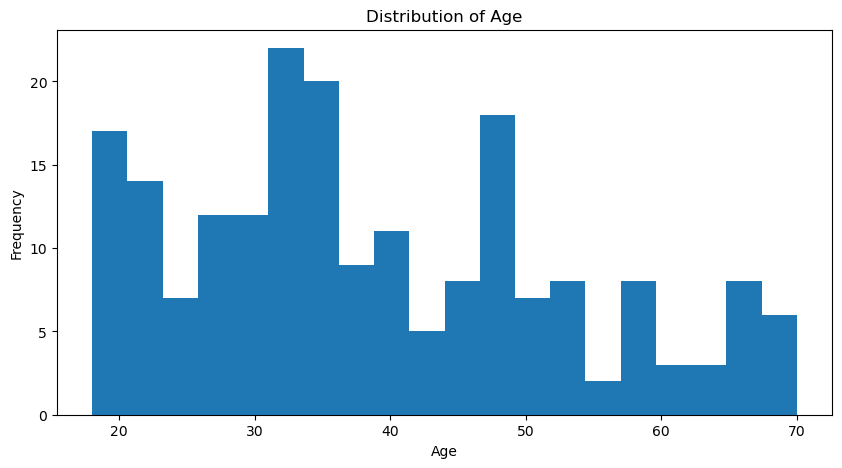

In [76]:
# Create a figure and axis size of the plot
fig, ax = plt.subplots(figsize = (10, 5))

# Plot a histogram of the 'Age' feature
df['Age'].plot(kind = 'hist', bins = 20)

# Label the x-axis to indicate the age of customers
plt.xlabel('Age')

# Add a title to describe the purpose of the visualization
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Annual Income (k$)')

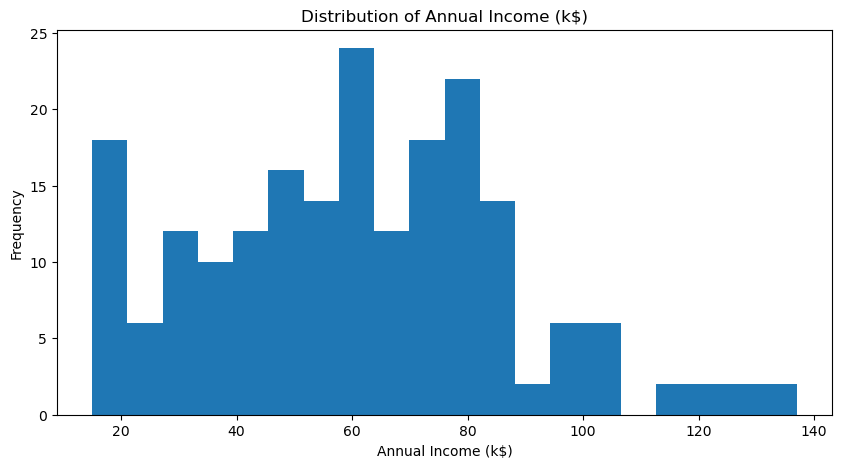

In [77]:
# Create a figure and axis size of the plot
fig, ax = plt.subplots(figsize = (10, 5))

# Plot a histogram of the 'Annual Income (k$)' feature
df['Annual Income (k$)'].plot(kind = 'hist', bins = 20)

# Label the x-axis to indicate the Annual Income (k$) of customers
plt.xlabel('Annual Income (k$)')

# Add a title to describe the purpose of the visualization
plt.title('Distribution of Annual Income (k$)')

Text(0.5, 1.0, 'Distribution of Spending Score (1-100)')

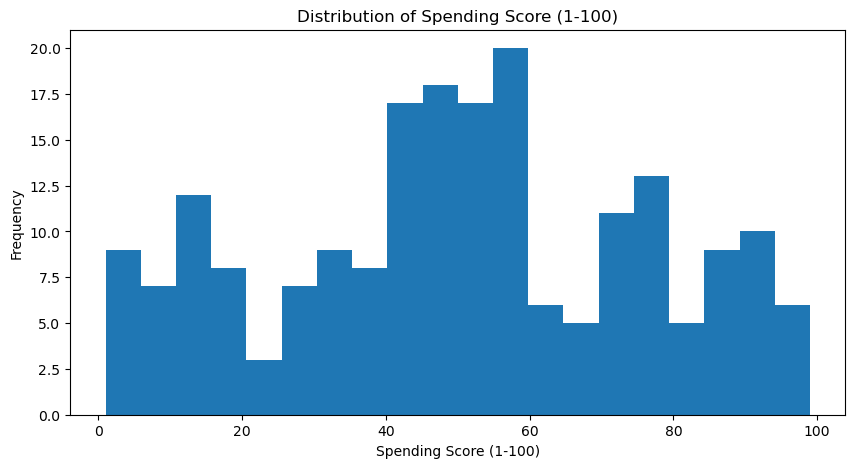

In [78]:
# Create a figure and axis size of the plot
fig, ax = plt.subplots(figsize = (10, 5))

# Plot a histogram of the 'Spending Score (1-100)' feature
df['Spending Score (1-100)'].plot(kind = 'hist', bins = 20)

# Label the x-axis to indicate the Spending Score (1-100) of customers
plt.xlabel('Spending Score (1-100)')

# Add a title to describe the purpose of the visualization
plt.title('Distribution of Spending Score (1-100)')

C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\978228339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender',


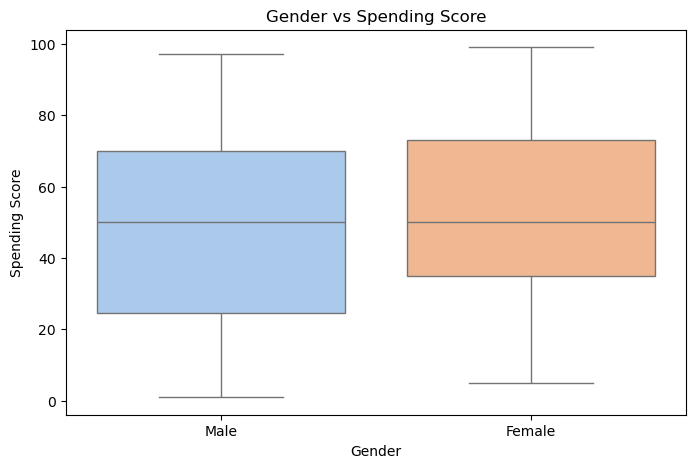

In [79]:
# Create a figure and axis size of the plot
plt.figure(figsize=(8, 5))

# Create a boxplot to compare spending scores across genders
# The boxplot shows the median, interquartile range,
# and potential outliers for each gender category
sns.boxplot(x='Gender',
    y='Spending Score (1-100)',
    data=df,
    palette='pastel'
)

# Add a descriptive title and axis labels
plt.title('Gender vs Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score')

#display the plot
plt.show()

3. Select Features for Clustering
● Start simple: Annual Income (k$) and Spending Score (1-100).

In [80]:
# Select relevant numerical features for unsupervised learning
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Display the shape of the feature matrix
print(X.shape)


X.head()

(200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


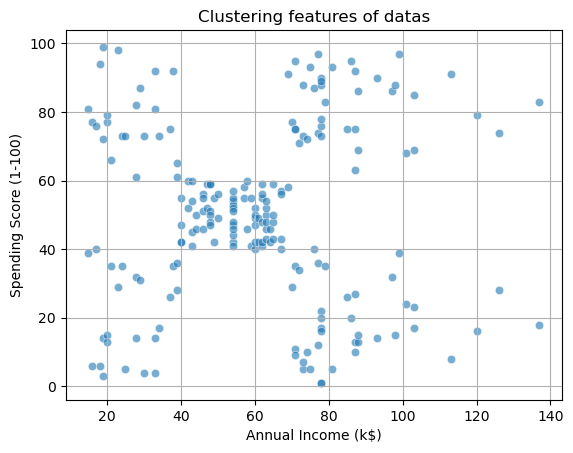

In [81]:
#Create a scatter plot to visualize the relationship between
sns.scatterplot(data = df, x = 	'Annual Income (k$)', y = 'Spending Score (1-100)', alpha = 0.6)


#Add a title to describe the purpose of the plot
plt.title('Clustering features of datas')


plt.grid()

In [82]:
#Initialize the K-Means clustering model
model = KMeans(n_clusters = 5, random_state = 42)


#Fit the K-Means model to the selected features
model.fit(X)

C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [83]:
#Retrieve the cluster labels assigned to each customer by the K-Means model
labels = model.labels_
labels[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2])

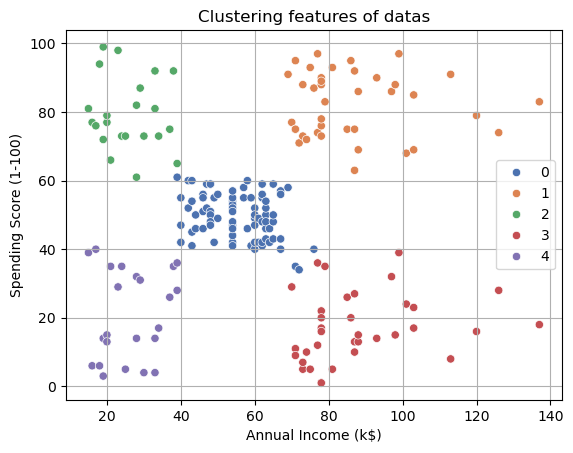

In [84]:
# Visualize the customer clusters using a scatter plot
sns.scatterplot(data = X, x = 	'Annual Income (k$)', y = 'Spending Score (1-100)',  hue= model.labels_, palette= 'deep' )

#add a title
plt.title('Clustering features of datas')
plt.grid()

4. Determine the Optimal Number of Clusters
● Use the Elbow Method and Silhouette Score
metrics

In [85]:
#Define a range of cluster numbers to evaluate
n_clusters = range(2, 11)
inertia_error = []

#Loop through each value of k to fit K-Means and record inertia
for k in n_clusters:

    # Initialize K-Means with the current number of clusters
    model = KMeans(n_clusters = k, random_state = 42, n_init = 10)

     #Fit the K-Means model on the data
    model.fit(X)

    #Store the inertia value for this k
    inertia_error.append(model.inertia_)

    #Print the inertia
    print(f'k = {k} : inertia = {model.inertia_:.3f}')

C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with M

k = 2 : inertia = 181363.596
k = 3 : inertia = 106348.373
k = 4 : inertia = 73679.789
k = 5 : inertia = 44448.455


C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with M

k = 6 : inertia = 37233.815
k = 7 : inertia = 30241.344
k = 8 : inertia = 25036.418
k = 9 : inertia = 21916.795
k = 10 : inertia = 20072.071


C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method for optimal number of clusters')

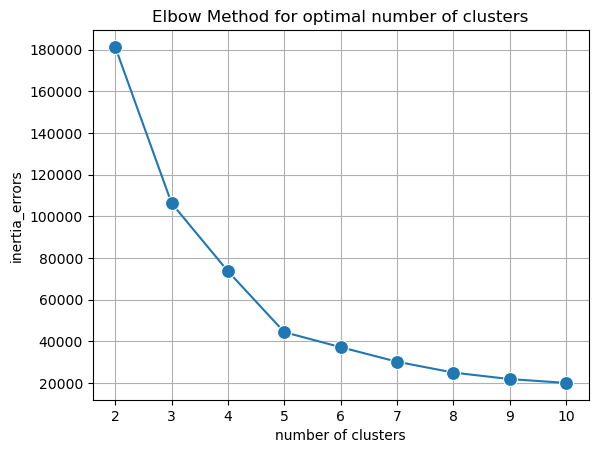

In [86]:
# Plot the inertia values against the number of clusters
# This is the Elbow Method visualization
sns.lineplot(x = n_clusters, y = inertia_error, marker= 'o', markersize=10 
            )

plt.xlabel('number of clusters')
plt.ylabel('inertia_errors')
plt.grid()
plt.title('Elbow Method for optimal number of clusters')

silhouette score

In [87]:
n_clusters = range(2, 11)
silhouette_scores = []
for n in n_clusters:
    # Create and fit KMeans model
    model = KMeans(n_clusters=n, random_state=42, n_init=10)
    cluster_labels = model.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"k={n}: Silhouette Score = {silhouette_avg:.3f}")

C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with M

k=2: Silhouette Score = 0.297
k=3: Silhouette Score = 0.468
k=4: Silhouette Score = 0.493
k=5: Silhouette Score = 0.554


C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with M

k=6: Silhouette Score = 0.540
k=7: Silhouette Score = 0.529
k=8: Silhouette Score = 0.455
k=9: Silhouette Score = 0.456
k=10: Silhouette Score = 0.441


C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


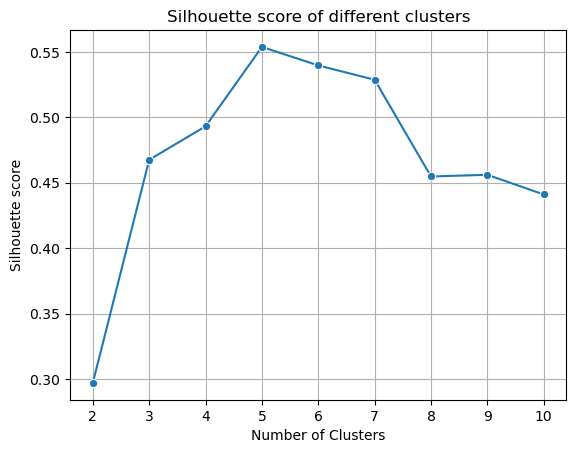

In [88]:
# Plot the Silhouette scores for different numbers of clusters
sns.lineplot(x = n_clusters, y = silhouette_scores, marker = 'o') # Mark each data point for clarity


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.grid()
plt.title('Silhouette score of different clusters')
plt.show()

5. Build the K-Means Model
● Pick the optimal number of clusters.
● Fit K-Means and assign cluster labels.

final model

In [91]:
# Initialize the final K-Means model with the chosen optimal number of clusters
final_model = KMeans(n_clusters = 5, random_state = 42, n_init=10)

#Fit the model to the data and predict cluster labels for each customer
cluster_labels = final_model.fit_predict(X)
cluster_labels[:10]

C:\Users\Admin\anacond\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2])

In [96]:
#Create a copy of the original dataset to preserve it
df_cluster = df.copy()


#Add a new column to store the predicted cluster labels
df_cluster['predicted_cluster'] = cluster_labels

In [97]:
df_cluster.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predicted_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [98]:
# Display the unique cluster labels in the dataset
df_cluster['predicted_cluster'].unique()

array([4, 2, 0, 1, 3])

communication
6. Visualize the Clusters

In [100]:
# Calculate the average Annual Income and Spending Score for each cluster
cluster_characteristics = df_cluster.groupby('predicted_cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()
cluster_characteristics

,Annual Income (k$),Spending Score (1-100)
predicted_cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


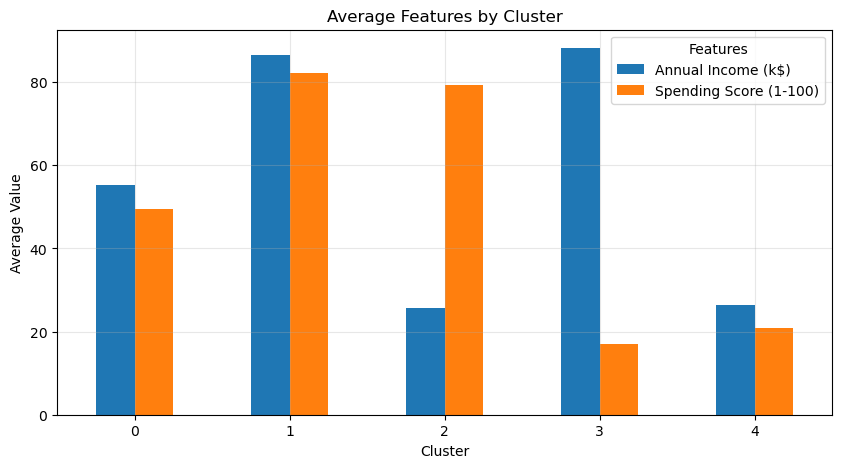

In [101]:
# Create a figure and axes for the bar plot
fig, axes = plt.subplots(figsize=(10, 5))

# Plot a bar chart of the average Annual Income and Spending Score for each cluster
cluster_characteristics.plot(kind='bar', ax=axes)
axes.set_xlabel('Cluster')
axes.set_ylabel('Average Value')
axes.set_title('Average Features by Cluster')
axes.tick_params(axis='x', rotation=0)
axes.legend(title='Features')
axes.grid(True, alpha=0.3)
plt.show()


COMMUNICATION TO STAKE HOLDERS
this mean;

1. The Big Spenders (Cluster 1) – They earn a lot and love to spend. These are our top customers and we want to keep them happy
2. The Young Shoppers (Cluster 2) – They don’t earn much yet, but they spend a lot. Maybe they love trends or bargains. With the right offers, they could become loyal customers.
3. The Middle Crowd (Cluster 0) – Average income, average spending. Steady customers which means they’re reliable but not extravagant.
4. The Savvy Rich (Cluster 3) – They earn a lot but don’t spend much. Perhaps they’re careful or selective. Special promotions might get their attention.
5. The Cautious Few (Cluster 4) – Low income, low spending. They buy only what they need. Hard to increase their spending, but still part of our customer base.

In short: Some spend big, some spend carefully, and some are in the middle. Now we know exactly who to target for promotions, discounts, and loyalty programs.